In [1]:
import os 
import numpy as np
import nibabel as nib
from nibabel.testing import data_path
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from skimage import measure
from PIL import Image, ImageDraw
import cv2

## Looking at one sample CT + its annotations

In [21]:
example_file_CT = 'T:/NN_courseproject/Totalsegmentator_dataset/s0001/ct.nii.gz'
img_ct = nib.load(example_file_CT)
img_ct.shape

(249, 188, 213)

In [22]:
example_file_ann1 = 'T:/NN_courseproject/Totalsegmentator_dataset/s0001/segmentations/liver.nii.gz'
img_ann1 = nib.load(example_file_ann1)
img_ann1.shape

(249, 188, 213)

In [34]:
example_file_ann2 = 'T:/NN_courseproject/Totalsegmentator_dataset/s0001/segmentations/urinary_bladder.nii.gz'
img_ann2 = nib.load(example_file_ann2)
img_ann2.shape

(249, 188, 213)

In [36]:
example_file_ann3 = 'T:/NN_courseproject/Totalsegmentator_dataset/s0001/segmentations/kidney_left.nii.gz'
img_ann3 = nib.load(example_file_ann3)
img_ann3.shape

(249, 188, 213)

In [38]:
example_file_ann4 = 'T:/NN_courseproject/Totalsegmentator_dataset/s0001/segmentations/small_bowel.nii.gz'
img_ann4 = nib.load(example_file_ann4)
img_ann4.shape

(249, 188, 213)

In [23]:
print(img_ct)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (249, 188, 213)
affine:
[[ 1.49672401e+00  3.48045491e-02 -9.28383470e-02 -1.74172134e+02]
 [-3.45467702e-02  1.49959612e+00  2.14285660e-03  2.55811043e+01]
 [ 9.28630605e-02  0.00000000e+00  1.49712265e+00  4.00303900e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 249 188 213   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        1.4999999 1.5       1.4999999 1.        1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max    

Text(0.5, 0.98, 'CT example slices')

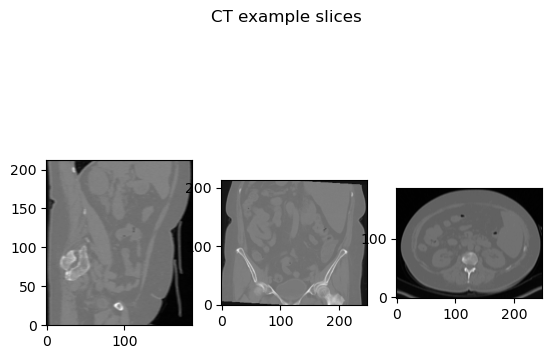

In [33]:
# 3d 
img_ct_data = img_ct.get_fdata()

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = img_ct_data[150, :, :]
slice_1 = img_ct_data[:, 90, :]
slice_2 = img_ct_data[:, :, 160]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("CT example slices")

Text(0.5, 0.98, 'Liver annotation example slices')

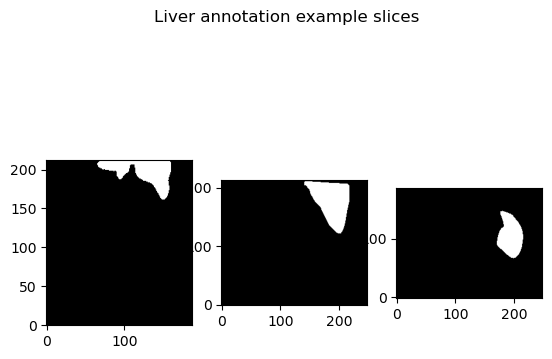

In [32]:
img_ann1_data = img_ann1.get_fdata()
slice_0_ann1 = img_ann1_data[150,:, :]
slice_1_ann1 = img_ann1_data[:, 90, :]
slice_2_ann1 = img_ann1_data[:, :, 160]
show_slices([slice_0_ann1, slice_1_ann1, slice_2_ann1])
plt.suptitle("Liver annotation example slices")

Text(0.5, 0.98, 'Bladder annotation example slices')

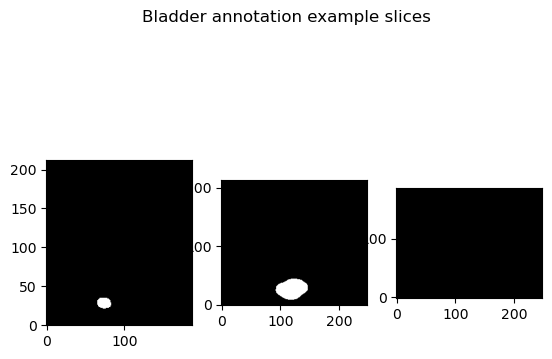

In [35]:
img_ann2_data = img_ann2.get_fdata()
slice_0_ann2 = img_ann2_data[150,:, :]
slice_1_ann2 = img_ann2_data[:, 90, :]
slice_2_ann2 = img_ann2_data[:, :, 160]
show_slices([slice_0_ann2, slice_1_ann2, slice_2_ann2])
plt.suptitle("Bladder annotation example slices")

Text(0.5, 0.98, 'Left kidney annotation example slices')

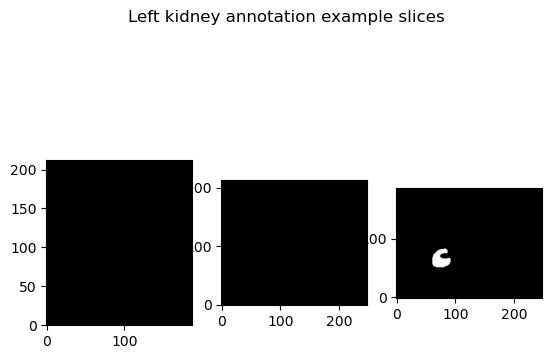

In [37]:
img_ann3_data = img_ann3.get_fdata()
slice_0_ann3 = img_ann3_data[150,:, :]
slice_1_ann3 = img_ann3_data[:, 90, :]
slice_2_ann3 = img_ann3_data[:, :, 160]
show_slices([slice_0_ann3, slice_1_ann3, slice_2_ann3])
plt.suptitle("Left kidney annotation example slices")

Text(0.5, 0.98, 'Small bowel annotation example slices')

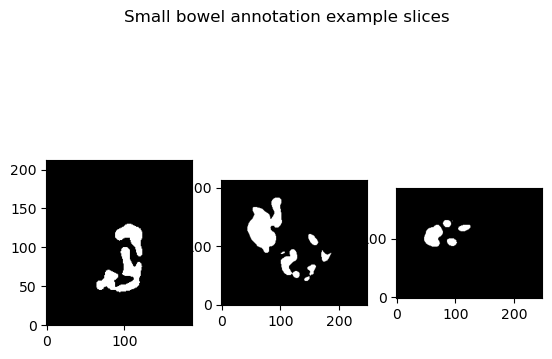

In [39]:
img_ann4_data = img_ann4.get_fdata()
slice_0_ann4 = img_ann4_data[150,:, :]
slice_1_ann4 = img_ann4_data[:, 90, :]
slice_2_ann4 = img_ann4_data[:, :, 160]
show_slices([slice_0_ann4, slice_1_ann4, slice_2_ann4])
plt.suptitle("Small bowel annotation example slices")